### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [242]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('../data/processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [243]:
initial_data = pd.read_csv('../data/taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [244]:
initial_data.shape[0] == processed_data.shape[0]

True

In [245]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [246]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [247]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [248]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

In [249]:
import matplotlib.pyplot as plt
plt.style.use ('dark_background')

import matplotlib as mlp

mlp.rcParams['lines.linewidth'] = 2

mlp.rcParams['xtick.major.size'] = 12
mlp.rcParams['xtick.major.width'] = 2
mlp.rcParams['xtick.labelsize'] = 6
mlp.rcParams['xtick.color'] = '#FF5533'

mlp.rcParams['ytick.major.size'] = 12
mlp.rcParams['ytick.major.width'] = 2
mlp.rcParams['ytick.labelsize'] = 6
mlp.rcParams['ytick.color'] = '#FF5533'

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 10
mlp.rcParams['axes.titlecolor'] = '#00B050'
mlp.rcParams['axes.labelcolor'] = '#00B050'

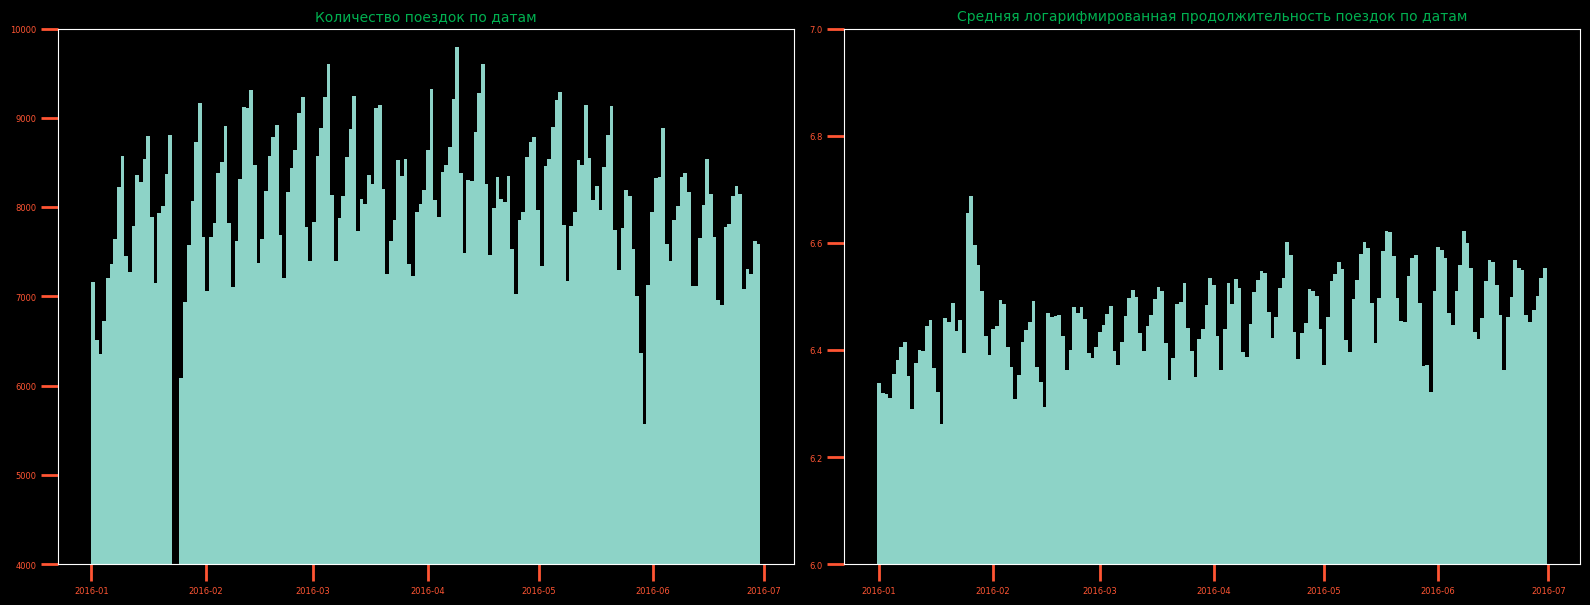

In [250]:
fig = plt.figure()

fig.set_size_inches(16, 6)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'], width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


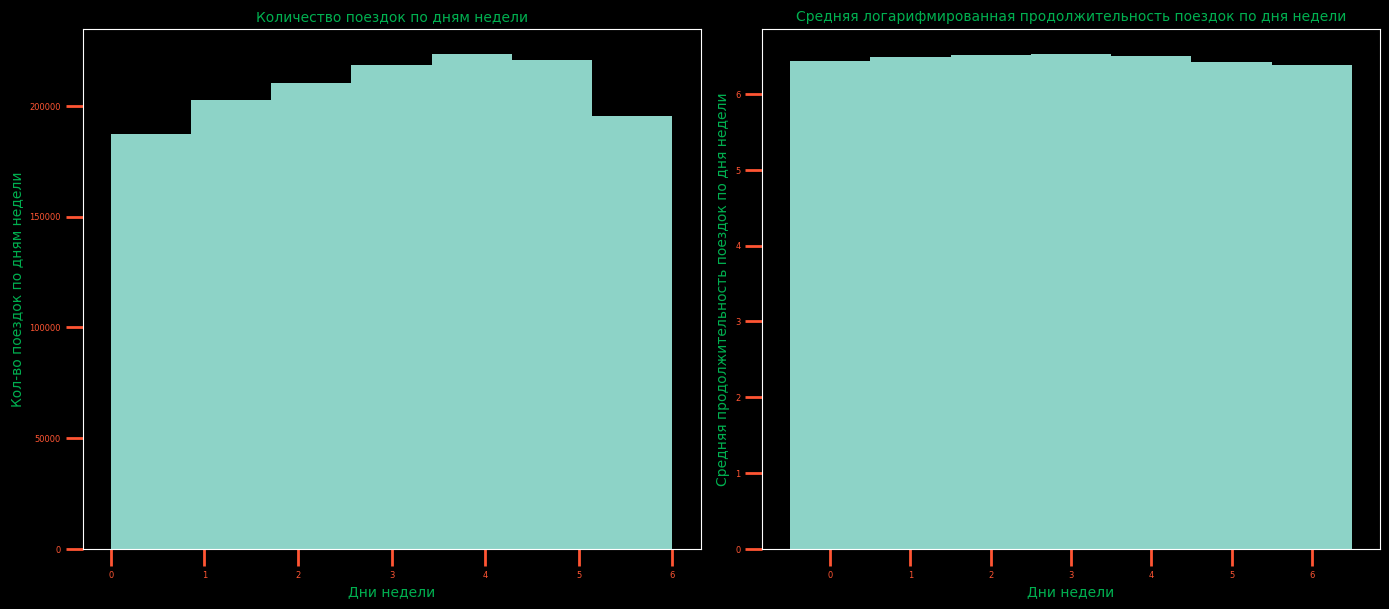

In [251]:
### Your code is here

fig = plt.figure()

fig.set_size_inches(14, 6)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.day_of_week.unique().shape[0])
#plt.ylim((4000, 10000))

plt.xlabel("Дни недели")
plt.ylabel("Кол-во поездок по дням недели")

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
#plt.ylim((0, 7))

plt.xlabel("Дни недели")
plt.ylabel("Средняя продолжительность поездок по дня недели")

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дня недели')

plt.show()

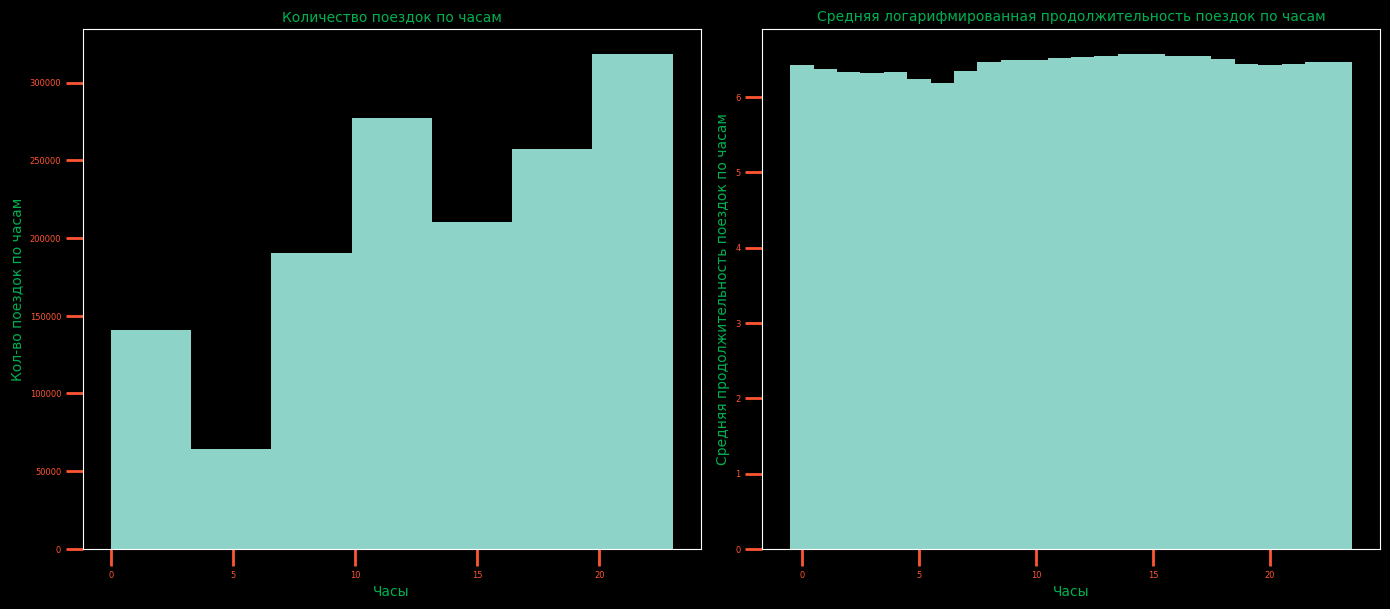

In [252]:
fig = plt.figure()

fig.set_size_inches(14, 6)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data.day_of_week.unique().shape[0])
#plt.ylim((4000, 10000))

plt.xlabel("Часы")
plt.ylabel("Кол-во поездок по часам")

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
#plt.ylim((0, 7))

plt.xlabel("Часы")
plt.ylabel("Средняя продолжительность поездок по часам")

fig.tight_layout()

ax_1.set(title = 'Количество поездок по часам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по часам')

plt.show()

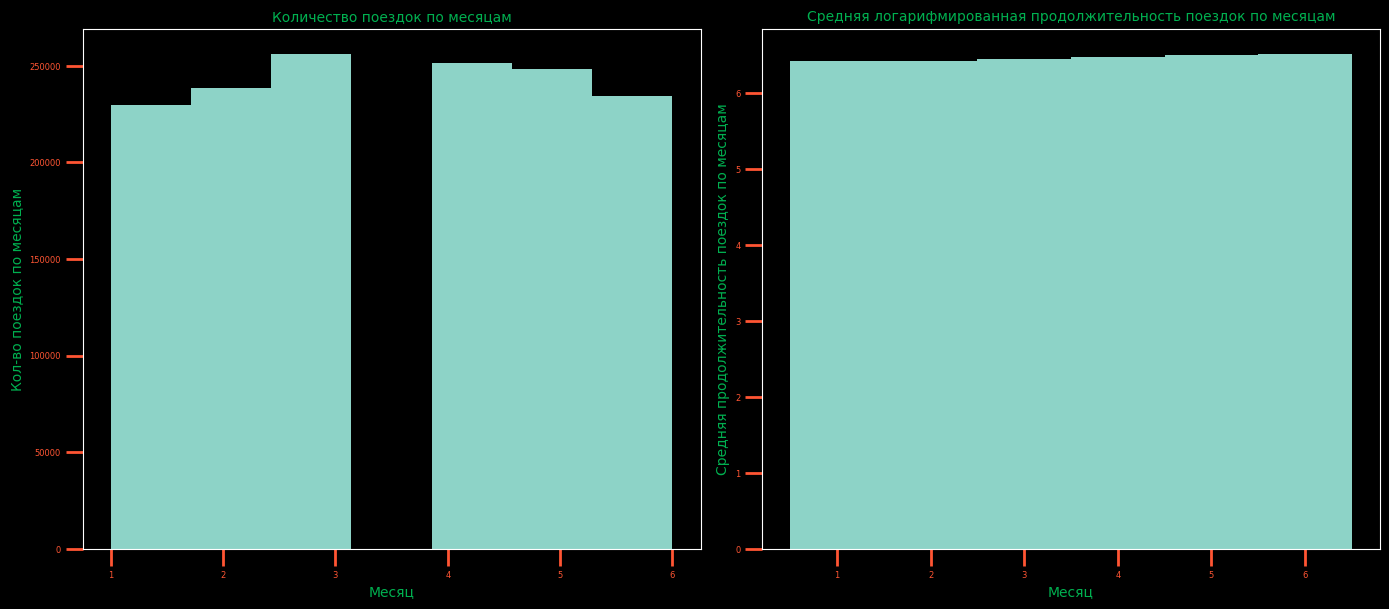

In [253]:
fig = plt.figure()

fig.set_size_inches(14, 6)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['month'], bins=processed_data.day_of_week.unique().shape[0])
#plt.ylim((4000, 10000))

plt.xlabel("Месяц")
plt.ylabel("Кол-во поездок по месяцам")

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['month'].unique())), 
        processed_data.groupby('month', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
#plt.ylim((0, 7))

plt.xlabel("Месяц")
plt.ylabel("Средняя продолжительность поездок по месяцам")

fig.tight_layout()

ax_1.set(title = 'Количество поездок по месяцам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по месяцам')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


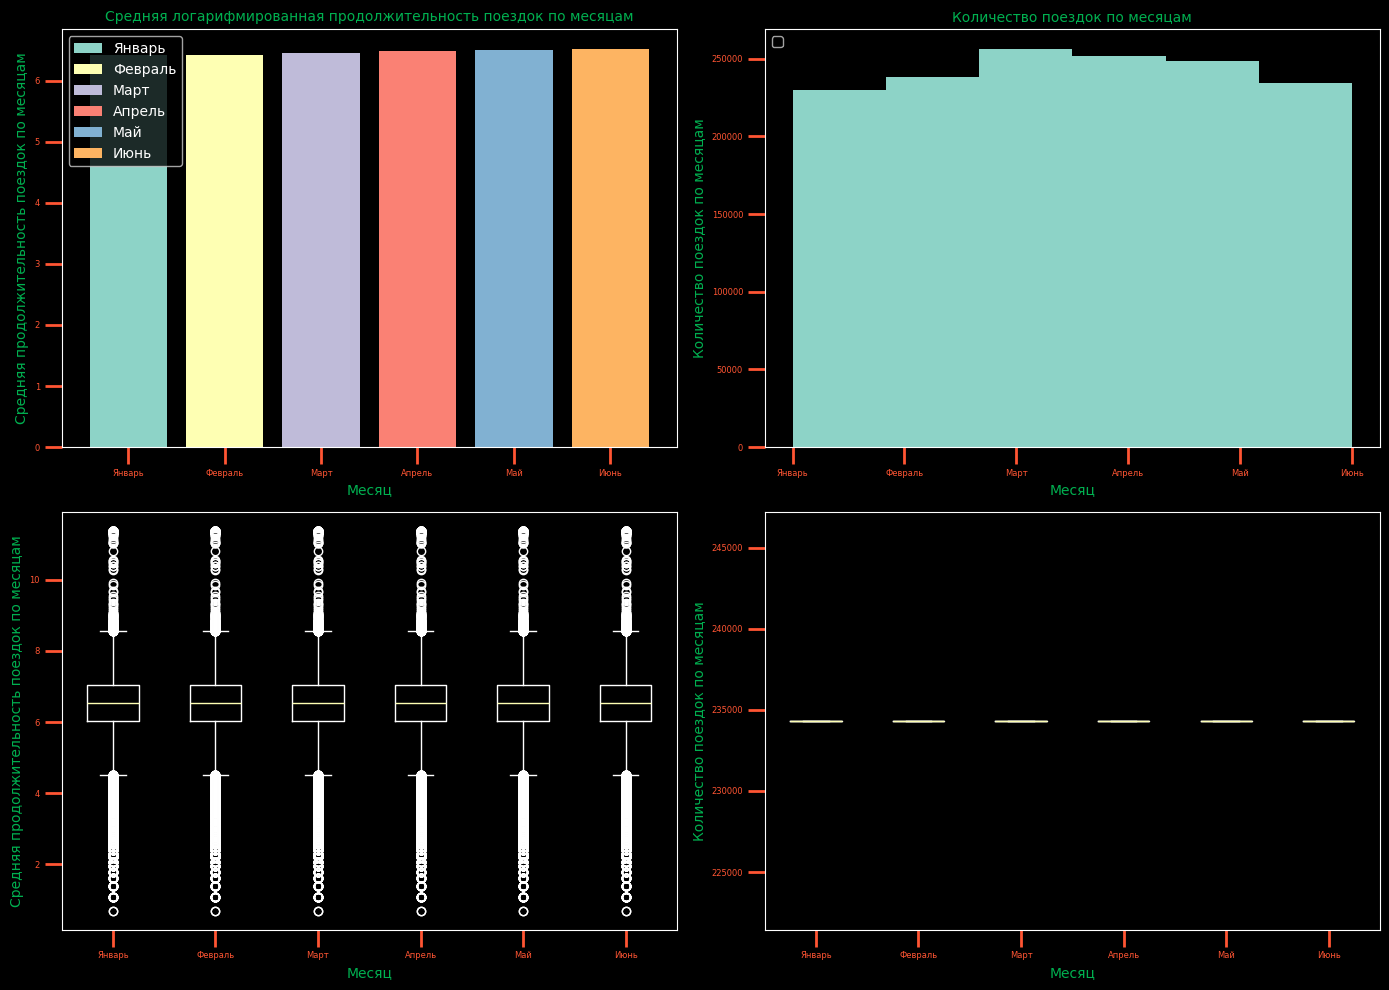

In [254]:
arr = sorted(list(processed_data['month'].unique()))
labels = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь']

fig = plt.figure(figsize=(14, 10))

# Первый subplot: средняя продолжительность поездок
plt.subplot(2, 2, 1)
for i, month in enumerate(arr):
    plt.bar(i, processed_data[processed_data['month'] == month]['log_trip_duration'].mean(), width=0.8, label=labels[i])
plt.xlabel("Месяц")
plt.ylabel("Средняя продолжительность поездок по месяцам")
plt.legend(loc='upper left')
plt.title('Средняя логарифмированная продолжительность поездок по месяцам')
plt.xticks(range(0, len(labels)), labels) 

# Второй subplot: количество поездок
plt.subplot(2, 2, 2)
plt.hist(processed_data['month'], bins=processed_data['month'].unique().shape[0])
plt.xlabel("Месяц")
plt.ylabel("Количество поездок по месяцам")
plt.legend(loc='upper left')
plt.title('Количество поездок по месяцам')
plt.xticks(range(1, len(labels)+1), labels) 

# Третий subplot: boxplot для средней продолжительности поездок
plt.subplot(2, 2, 3)
data_duration = []
for i, day in enumerate(arr):
    data_duration.append(processed_data[processed_data['month'] == month]['log_trip_duration'].values)
plt.boxplot(data_duration)
plt.xlabel("Месяц")
plt.ylabel("Средняя продолжительность поездок по месяцам")
plt.xticks(range(1, len(labels) + 1), labels)  # Установка меток для оси x

# Четвертый subplot: boxplot для количества поездок
plt.subplot(2, 2, 4)
data_count = []
for i, day in enumerate(arr):
    data_count.append(processed_data[processed_data['month'] == month].count())
plt.boxplot(data_count)
plt.xlabel("Месяц")
plt.ylabel("Количество поездок по месяцам")
plt.xticks(range(1, len(labels) + 1), labels)  # Установка меток для оси x

plt.tight_layout()
plt.show()

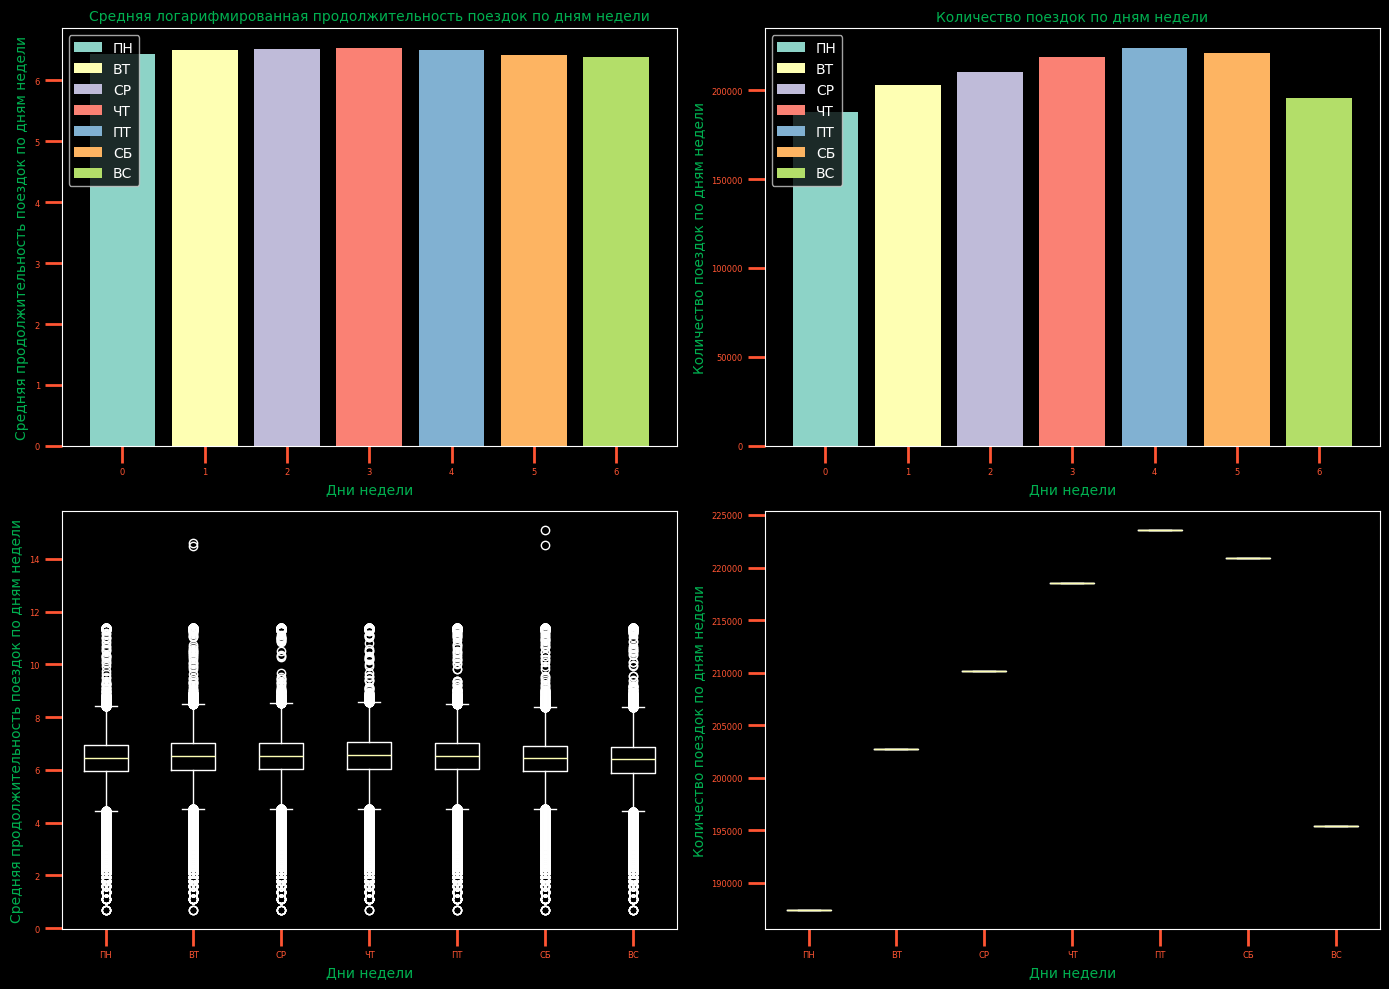

In [255]:
arr = sorted(list(processed_data['day_of_week'].unique()))
labels = ['ПН', 'ВТ', 'СР', 'ЧТ', 'ПТ', 'СБ', 'ВС']

fig = plt.figure(figsize=(14, 10))

# Первый subplot: средняя продолжительность поездок
plt.subplot(2, 2, 1)
for i, day in enumerate(arr):
    plt.bar(i, processed_data[processed_data['day_of_week'] == day]['log_trip_duration'].mean(), width=0.8, label=labels[i])
plt.xlabel("Дни недели")
plt.ylabel("Средняя продолжительность поездок по дням недели")
plt.legend(loc='upper left')
plt.title('Средняя логарифмированная продолжительность поездок по дням недели')

# Второй subplot: количество поездок
plt.subplot(2, 2, 2)
for i, day in enumerate(arr):
    plt.bar(i, processed_data[processed_data['day_of_week'] == day].count(), width=0.8, label=labels[i])
plt.xlabel("Дни недели")
plt.ylabel("Количество поездок по дням недели")
plt.legend(loc='upper left')
plt.title('Количество поездок по дням недели')

# Третий subplot: boxplot для средней продолжительности поездок
plt.subplot(2, 2, 3)
data_duration = []
for i, day in enumerate(arr):
    data_duration.append(processed_data[processed_data['day_of_week'] == day]['log_trip_duration'].values)
plt.boxplot(data_duration)
plt.xlabel("Дни недели")
plt.ylabel("Средняя продолжительность поездок по дням недели")
plt.xticks(range(1, len(labels) + 1), labels)  # Установка меток для оси x

# Четвертый subplot: boxplot для количества поездок
plt.subplot(2, 2, 4)
data_count = []
for i, day in enumerate(arr):
    data_count.append(processed_data[processed_data['day_of_week'] == day].count())
plt.boxplot(data_count)
plt.xlabel("Дни недели")
plt.ylabel("Количество поездок по дням недели")
plt.xticks(range(1, len(labels) + 1), labels)  # Установка меток для оси x

plt.tight_layout()
plt.show()

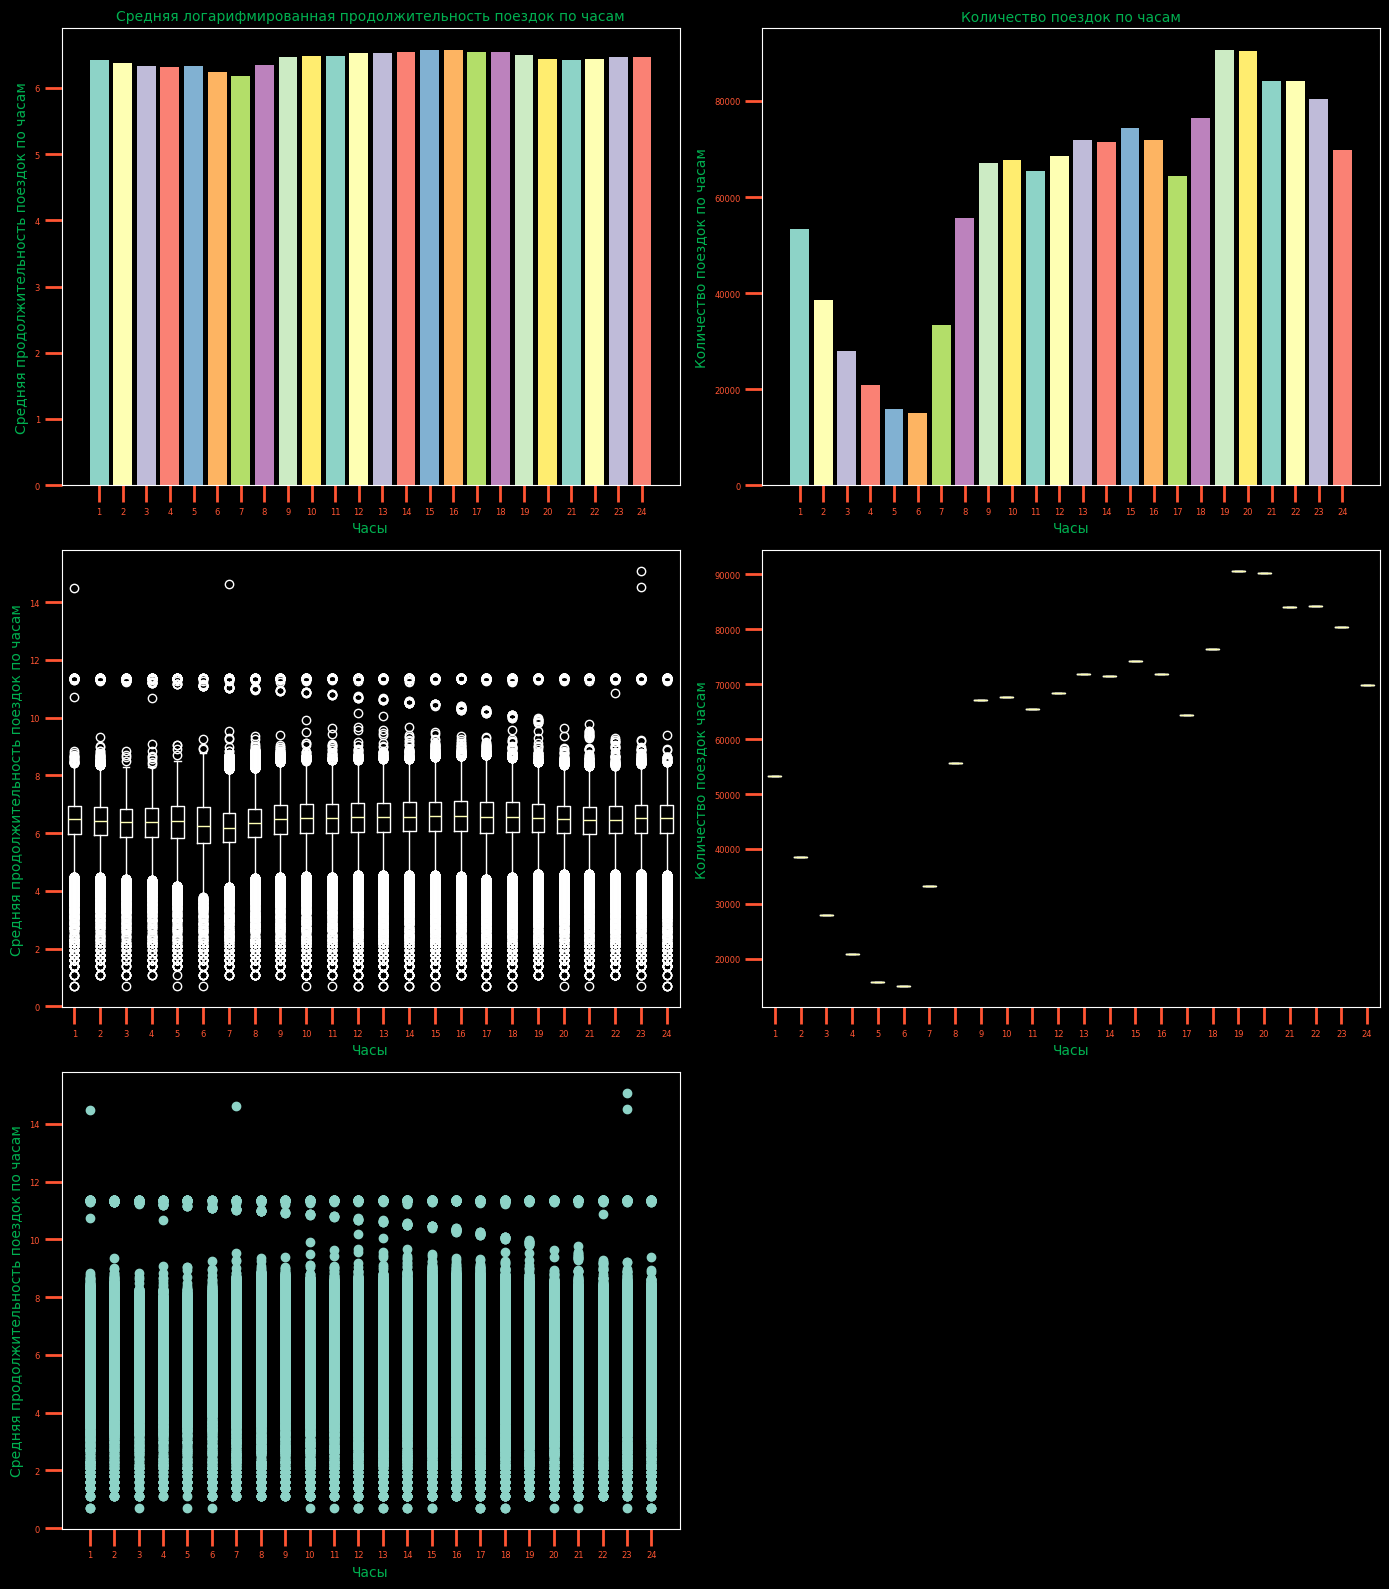

In [256]:
arr = sorted(list(processed_data['hour'].unique()))

fig = plt.figure(figsize=(14, 16))

# Первый subplot: средняя продолжительность поездок
plt.subplot(3, 2, 1)
labels = []
for i, hour in enumerate(arr):
    plt.bar(i, processed_data[processed_data['hour'] == hour]['log_trip_duration'].mean(), width=0.8, label=i+1)
    labels.append(i+1)
plt.xticks(range(24))  # Установка меток для оси x
plt.xlabel("Часы")
plt.ylabel("Средняя продолжительность поездок по часам")
plt.title('Средняя логарифмированная продолжительность поездок по часам')
plt.xticks(range(0, len(labels)), labels)  # Установка меток для оси x

# Второй subplot: количество поездок
plt.subplot(3, 2, 2)
labels = []
for i, hour in enumerate(arr):
    plt.bar(i, processed_data[processed_data['hour'] == hour].count(), width=0.8, label=i+1)
    labels.append(i+1)
plt.xticks(range(24))  # Установка меток для оси x
plt.xlabel("Часы")
plt.ylabel("Количество поездок по часам")
plt.title('Количество поездок по часам')
plt.xticks(range(0, len(labels)), labels)  # Установка меток для оси x

# Третий subplot: boxplot для средней продолжительности поездок
plt.subplot(3, 2, 3)
labels = []
data_duration = []
for i, hour in enumerate(arr):
    data_duration.append(processed_data[processed_data['hour'] == hour]['log_trip_duration'].values)
    labels.append(i+1)
plt.boxplot(data_duration)
plt.xlabel("Часы")
plt.ylabel("Средняя продолжительность поездок по часам")
plt.xticks(range(1, len(labels) + 1), labels)  # Установка меток для оси x

# Четвертый subplot: boxplot для количества поездок
plt.subplot(3, 2, 4)
labels = []
data_count = []
for i, hour in enumerate(arr):
    data_count.append(processed_data[processed_data['hour'] == hour].count())
    labels.append(i+1)
plt.boxplot(data_count)
plt.xlabel("Часы")
plt.ylabel("Количество поездок часам")
plt.xticks(range(1, len(labels) + 1), labels)  # Установка меток для оси x

processed_data_exp = processed_data.copy()
sorted_process_data = processed_data_exp.sort_values(by='hour')

plt.subplot(3, 2, 5)
plt.scatter(x = sorted_process_data['hour'] , y = sorted_process_data['log_trip_duration'])
plt.xlabel("Часы")
plt.ylabel("Средняя продолжительность поездок по часам")
plt.xticks(range(0, len(labels)), labels)  # Установка меток для оси x

plt.tight_layout()
plt.show()

In [257]:
num_index = processed_data['hour'].reset_index().index
num_index

RangeIndex(start=0, stop=1458644, step=1)

In [258]:
mean_time = processed_data.groupby('hour').agg({'log_trip_duration': 'mean'})
count_time = processed_data.groupby('hour').size().to_frame(name="count_time")

hours_df = pd.concat([mean_time, count_time], axis=1)
hours_df

,log_trip_duration,count_time
hour,,
0,6.422417,53248
1,6.373789,38571
2,6.325211,27972
3,6.318661,20895
4,6.328824,15792
5,6.240214,15002
6,6.186512,33248
7,6.349027,55600
8,6.465236,67053


In [259]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(hours_df)
scaled_hours_df = scaler.transform(hours_df)
scaled_hours_df = pd.DataFrame(scaled_hours_df, columns=['Средняя продолжительность', 'Кол-во поездок'])
scaled_hours_df

,Средняя продолжительность,Кол-во поездок
0,0.612918,0.505913
1,0.486574,0.311768
2,0.360361,0.171565
3,0.343343,0.077952
4,0.369748,0.010450
5,0.139525,0.000000
6,0.000000,0.241356
7,0.422240,0.537025
8,0.724167,0.688524
9,0.771698,0.696593


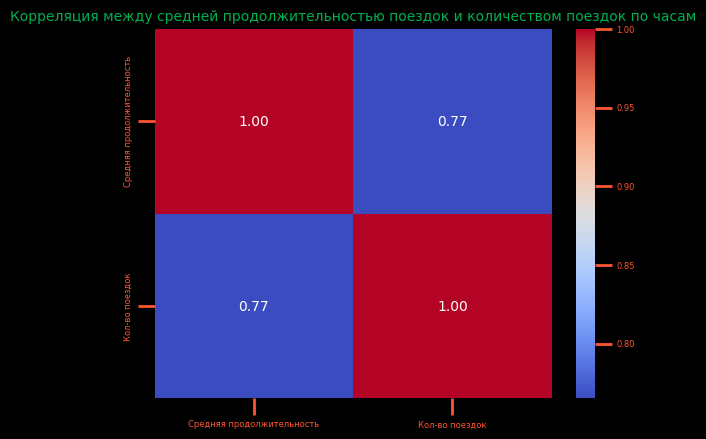

In [260]:
import seaborn as sns

# Вычисление корреляции
correlation_matrix = scaled_hours_df.corr()

# Построение тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция между средней продолжительностью поездок и количеством поездок по часам')
plt.show()

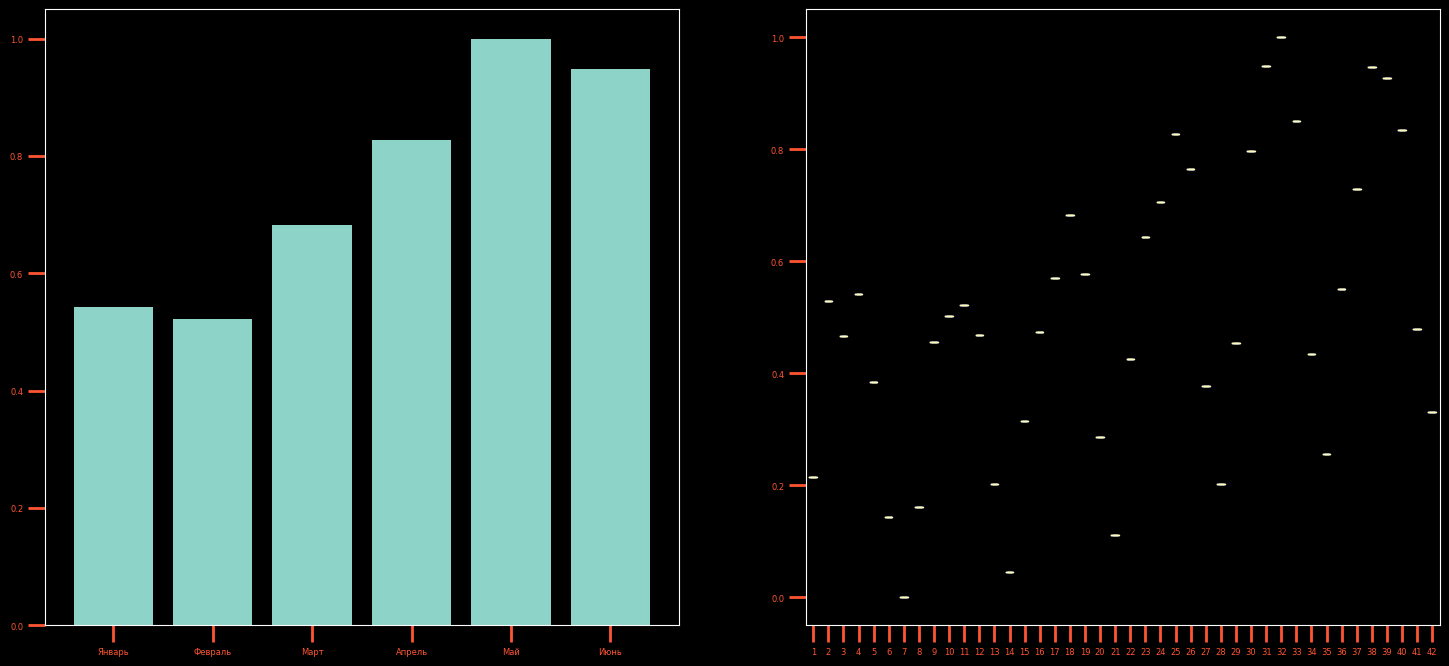

In [261]:
from sklearn.preprocessing import MinMaxScaler

df = processed_data.groupby(['month', 'day_of_week']).agg({'log_trip_duration': 'mean'})
df.reset_index(drop=False, inplace=True)

# Удалим категориальные переменные перед масштабированием
df_numeric = df.drop(['month', 'day_of_week'], axis=1)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Заменяем столбец с масштабированными данными в DataFrame
df['log_trip_duration_scaled'] = scaled_data

fig = plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.bar(x=df['month'], height=df['log_trip_duration_scaled'])

plt.xticks(ticks=range(1, 7), labels=['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь'])

plt.subplot(1, 2, 2)
data = []

# Определение переменной months
months = df['month'].values
days = df['day_of_week'].values

for i, (index, row) in enumerate(df.iterrows()):
    month_data = df[(df['month'] == months[i]) & (df['day_of_week'] == days[i])]['log_trip_duration_scaled'].values
    data.append(month_data)

plt.boxplot(data)

plt.show()


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

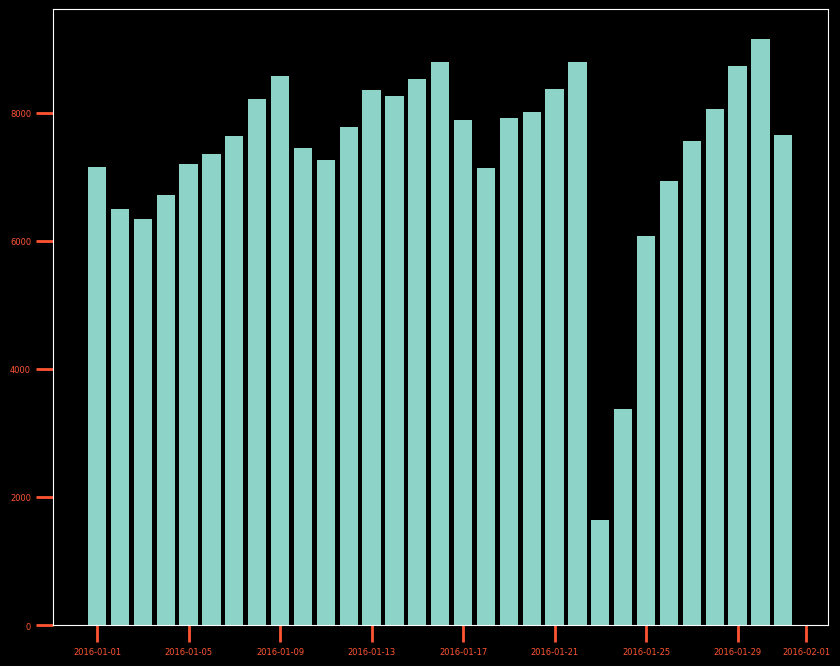

In [262]:
df = processed_data.sort_values(by='date')
df = df[df['month'] == 1]
df_g = df.groupby('date').size()
fig = plt.figure()
fig.set_size_inches(10, 8)

plt.bar(df_g.index, df_g)

plt.show()

In [263]:
df_g.to_frame()

,0
date,
2016-01-01,7162
2016-01-02,6512
2016-01-03,6353
2016-01-04,6725
2016-01-05,7204
2016-01-06,7365
2016-01-07,7649
2016-01-08,8229
2016-01-09,8578


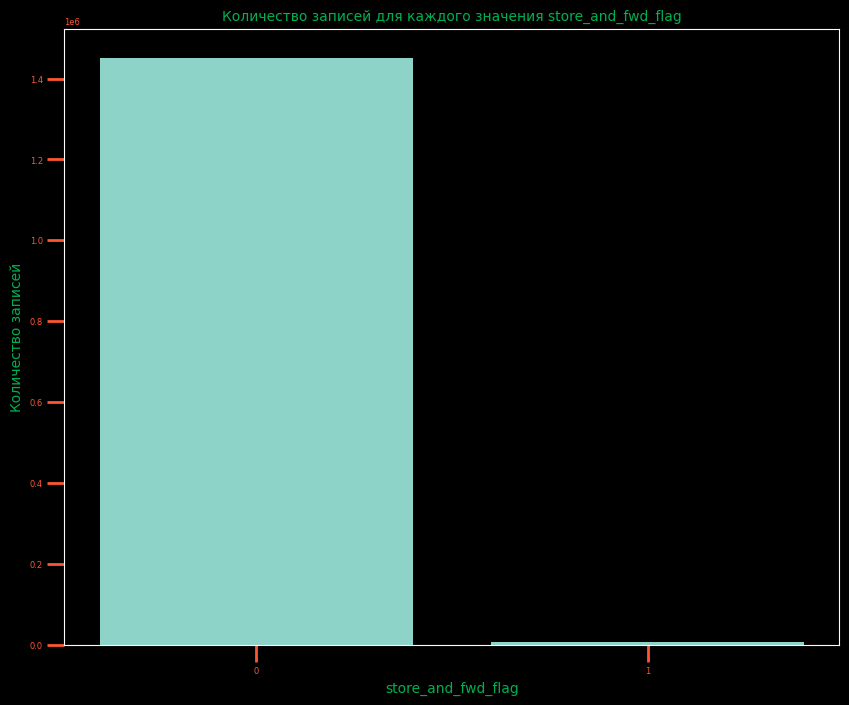

In [264]:
fig = plt.figure()
fig.set_size_inches(10, 8)

# Подсчет количества записей для каждого значения
value_counts = processed_data['store_and_fwd_flag'].value_counts()

# Построение бар-графика
plt.bar(value_counts.index, value_counts.values)

# Установка меток на оси X
plt.xticks([0, 1], ['0', '1'])

plt.xlabel("store_and_fwd_flag")
plt.ylabel("Количество записей")
plt.title("Количество записей для каждого значения store_and_fwd_flag")

plt.show()


In [265]:
### Создадим первый бинарный признак
### Your code is here

# Создаем столбец 'anomaly' и присваиваем ему значения 0 по умолчанию
processed_data['anomaly'] = 0

processed_data['date'] = pd.to_datetime(processed_data['date'])

processed_data['day'] = processed_data['date'].dt.day

# Устанавливаем значения 1 для аномальных дат
processed_data.loc[(processed_data['month'] == 1) & (processed_data['day'].isin([23])), 'anomaly'] = 1

processed_data.drop(columns=['day'], axis=1, inplace=True)

In [266]:
### Создадим второй бинарный признак
### Your code is here

# Шаг 1: Сгруппируем данные и посчитаем среднее значение log_trip_duration
pick_hour = processed_data.groupby(['day_of_week', 'hour']).agg({'log_trip_duration': 'mean'})

# Шаг 2: Найдем топ-10 пар с самым большим средним значением log_trip_duration
top_10_pairs = pick_hour.nlargest(10, 'log_trip_duration')

# Шаг 3: Создадим бинарный признак для каждой поездки
processed_data['traffic_jam'] = 0  # Инициализируем новую колонку со значением 0
for index, row in top_10_pairs.iterrows():
    # Устанавливаем значение 1 для поездок во времена, входящие в топ-10

    processed_data.loc[(processed_data['day_of_week'] == index[0]) & (processed_data['hour'] == index[1]), 'traffic_jam'] = 1

In [267]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [268]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [269]:
### Делаем OneHotEncoding и конкатим с processed_data

for col in ['day_of_week', 'hour', 'month']:
    dummies = pd.get_dummies(processed_data[col], prefix=f"{col}", drop_first=True)
    dummies.replace({False: 0, True: 1}, inplace=True)
    processed_data = pd.concat([processed_data, dummies], axis=1)
    processed_data.drop(col, axis=1, inplace=True)


In [270]:
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
id1049543,0,930.399753,0,6.056935,6.486161,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
id2304944,1,930.399753,0,7.832952,6.639876,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [271]:
file_path = '../data/less_7_task_4.csv'
processed_data.head(5).to_csv(file_path, sep=',', index=True)
df = pd.read_csv(file_path, sep=',')
df

,id,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
0,id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [272]:
print(df.dtypes)

id                     object
vendor_id               int64
passenger_count       float64
store_and_fwd_flag      int64
distance_km           float64
log_trip_duration     float64
anomaly                 int64
traffic_jam             int64
day_of_week_1           int64
day_of_week_2           int64
day_of_week_3           int64
day_of_week_4           int64
day_of_week_5           int64
day_of_week_6           int64
hour_1                  int64
hour_2                  int64
hour_3                  int64
hour_4                  int64
hour_5                  int64
hour_6                  int64
hour_7                  int64
hour_8                  int64
hour_9                  int64
hour_10                 int64
hour_11                 int64
hour_12                 int64
hour_13                 int64
hour_14                 int64
hour_15                 int64
hour_16                 int64
hour_17                 int64
hour_18                 int64
hour_19                 int64
hour_20   

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

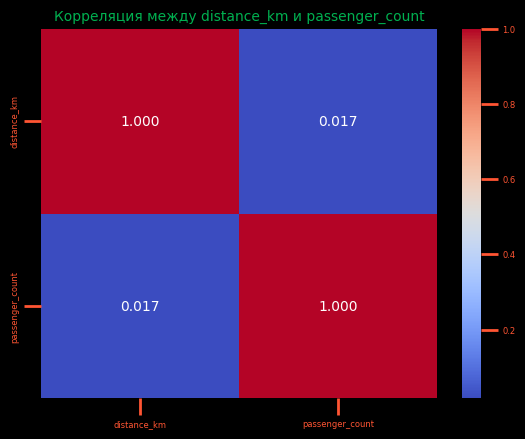

In [281]:
### Your code is here

# Вычисление корреляции
processed_data_corr = processed_data[['distance_km', 'passenger_count']].corr()

# Построение тепловой карты
sns.heatmap(processed_data_corr, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Корреляция между distance_km и passenger_count')
plt.show()

In [274]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [282]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

X = processed_data.drop(columns=['log_trip_duration'], axis=1)
Y = processed_data['log_trip_duration']

model = LinearRegression()

sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')
sfs.fit(X, Y)

sfs.get_support()


array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [283]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here

sfs.get_feature_names_out()


array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [287]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

columns = sfs.get_feature_names_out()

model = LinearRegression()

model.fit(processed_data[columns], Y)

MSE = np.mean((model.predict(processed_data[columns]) - Y) ** 2)

print(round(MSE, 3))

0.415


In [288]:
model.coef_

array([ 0.10740057,  0.17669212, -0.12856953, -0.43669671, -0.36219558])

In [299]:
gen = processed_data.groupby('log_trip_duration')['distance_km'].transform('mean').to_frame()
orig = processed_data['distance_km'].to_frame()

concated = pd.concat([gen, orig], axis=1)
concated.columns = ['gen_distance_km', 'orig_distance_km']
concated


,gen_distance_km,orig_distance_km
id,,
id2875421,1.672162,1.500479
id2377394,2.366328,1.807119
id3858529,10.348497,6.392080
id3504673,1.581824,1.487155
id2181028,1.638725,1.189925
...,...,...
id2376096,2.841926,1.226296
id1049543,2.413773,6.056935
id2304944,2.854360,7.832952
